In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl 
import numpy as np
%matplotlib inline


In [36]:
dfdp = pd.read_csv('Data Pelanggan.csv')
dfdp.head(91)

,Umur,Jenis Kelamin,Pendidikan Terakhir,Pekerjaan,Berapa jumlah uang yang anda habiskan dalam sehari untuk membeli cemilan,Seberapa sering anda membeli yogurt bark fruity ini,Jenis Yogurt Bark Fruity sering anda dibeli,Berapa tingkat Kepuasan Anda terhadap produk Yogurt Bark Fruity,Yogurt Bark Fruity rasa apa yang anda sukai?,Apakah untuk harga Rp 8.000 - Rp 9.000 ramah untuk kantong pelajar?,Media sosial apa yang paling sering anda gunakan?
0,1,1,4,1,2,3,1,4,1,1,5
1,2,2,5,2,2,1,1,4,1,1,2
2,2,1,3,1,2,1,1,4,1,1,2
3,2,1,3,1,2,3,1,4,1,1,3
4,2,1,3,1,2,2,1,4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
86,2,1,3,1,2,3,1,4,1,1,4
87,2,1,3,1,2,1,1,4,1,1,3
88,2,1,4,1,2,3,1,5,1,1,4
89,2,1,4,1,2,3,1,4,1,1,5


In [ ]:
dfdp = pd.read_csv('Data Pelanggan.csv')
x = dfdp.iloc[:,1:11].values
x[:91]

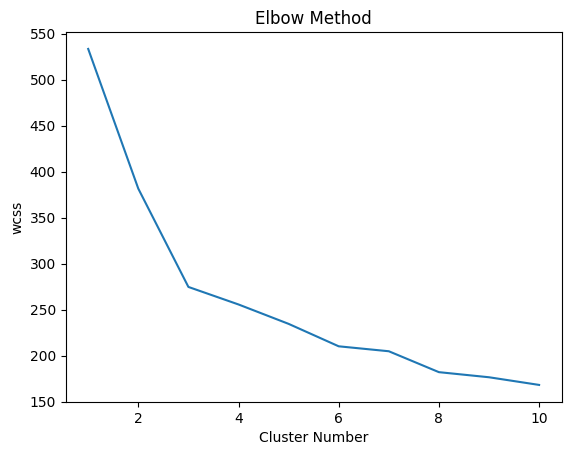

In [39]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state= 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('wcss')
plt.show()

In [50]:
kmeans = KMeans(n_clusters= 3, init = 'k-means++', random_state= 42)
y_kmeans = kmeans.fit_predict(x)

dfdp['f_cluster'] = y_kmeans + 1
dfdp.head(91)

,Umur,Jenis Kelamin,Pendidikan Terakhir,Pekerjaan,Berapa jumlah uang yang anda habiskan dalam sehari untuk membeli cemilan,Seberapa sering anda membeli yogurt bark fruity ini,Jenis Yogurt Bark Fruity sering anda dibeli,Berapa tingkat Kepuasan Anda terhadap produk Yogurt Bark Fruity,Yogurt Bark Fruity rasa apa yang anda sukai?,Apakah untuk harga Rp 8.000 - Rp 9.000 ramah untuk kantong pelajar?,Media sosial apa yang paling sering anda gunakan?,f_cluster,t_cluster
0,1,1,4,1,2,3,1,4,1,1,5,1,1
1,2,2,5,2,2,1,1,4,1,1,2,3,3
2,2,1,3,1,2,1,1,4,1,1,2,3,3
3,2,1,3,1,2,3,1,4,1,1,3,1,1
4,2,1,3,1,2,2,1,4,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2,1,3,1,2,3,1,4,1,1,4,1,1
87,2,1,3,1,2,1,1,4,1,1,3,1,1
88,2,1,4,1,2,3,1,5,1,1,4,1,1
89,2,1,4,1,2,3,1,4,1,1,5,1,1


<function matplotlib.pyplot.show(close=None, block=None)>

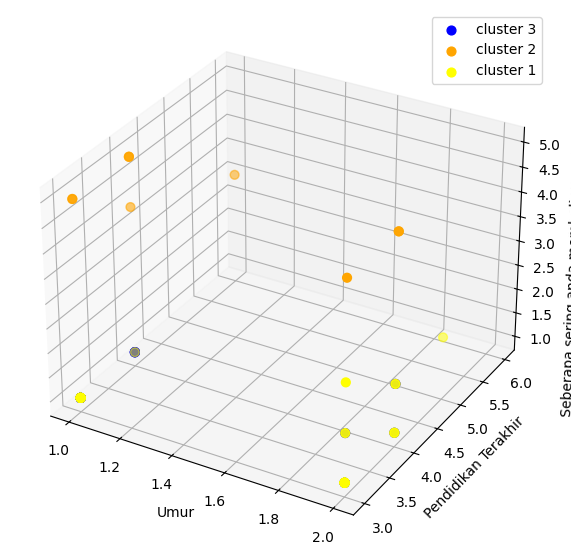

In [51]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],x[y_kmeans == 0,2], s= 40 , color ="blue", label="cluster 3")
ax.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],x[y_kmeans == 1,2], s= 40 , color ="orange", label="cluster 2")
ax.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],x[y_kmeans == 2,2], s= 40 , color ="yellow", label="cluster 1")
ax.set_xlabel ('Umur')
ax.set_ylabel ('Pendidikan Terakhir')
ax.set_zlabel ('Seberapa sering anda membeli yogurt bark fruity ini')
ax.legend()
plt.show
